In [2]:
!pip install category_encoders

   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   ---------------------------------------- 85.7/85.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/232.9 kB ? eta -:--:--
   --------------------- ------------------ 122.9/232.9 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 232.9/232.9 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
    --------------------------------------- 0.2/9.9 MB 5.6 MB/s eta 0:00:02
   - -------------------------------------- 0.4/9.9 MB 5.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/9.9 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.9 MB 7.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.9 MB 6.9 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.9 MB 7.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.9 MB 8.0 MB/s eta 0:00:01
   ----------- -----


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\atosa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# --- Cell 1: Import Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# --- Cell 2: Load and Inspect the Data ---
file_path = "D:/University-Prj/ML0/insurance.csv"
insurance_data = pd.read_csv(file_path)

print("First few rows:")
print(insurance_data.head())
print("\nData Info:")
print(insurance_data.info())
print("\nMissing Values:")
print(insurance_data.isnull().sum())


First few rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing Values:
age         0
sex         0
bmi         0
chil

In [ ]:
# --- Cell 3: Convert Categorical Variables ---
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [ ]:
# --- Cell 4: Prepare Data for Modeling ---
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

In [ ]:
# --- Cell 5: Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# --- Cell 6: Scale Numerical Features ---
numerical_features = ['age', 'bmi', 'children']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# --- Cell 7: Define Parameter Grid for GridSearchCV --
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

In [ ]:
# --- Cell 8: Instantiate and Fit GridSearchCV ---
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# --- Cell 9: Get Best Parameters ---
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# --- Cell 10: Make Predictions ---
y_pred = best_rf.predict(X_test)

In [ ]:
# --- Cell 11: Evaluate the Model ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 19515197.63302243
R-squared: 0.8742972168242384


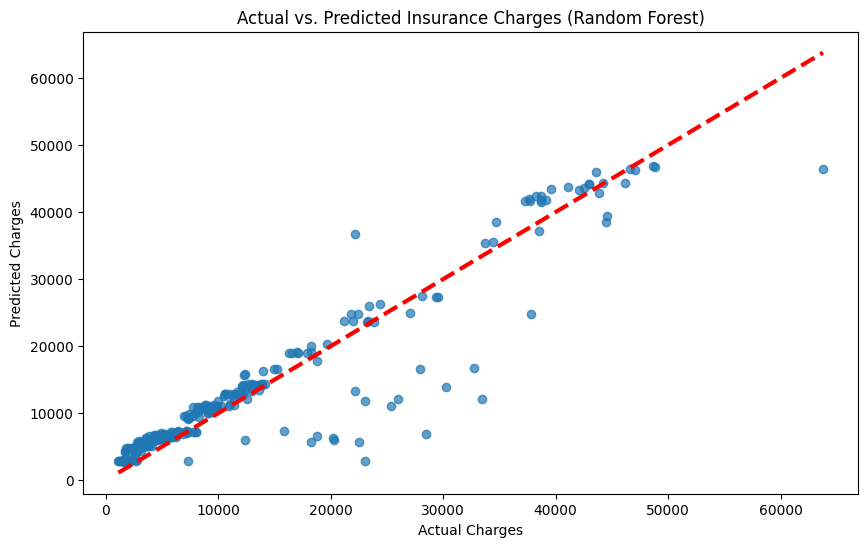

In [15]:
# --- Cell 12: Visualize Predictions ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Insurance Charges (Random Forest)")
plt.show()  # Use plt.show() instead of plt.savefig()

In [16]:
# --- Cell 13: Feature Importance ---
feature_importances = best_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

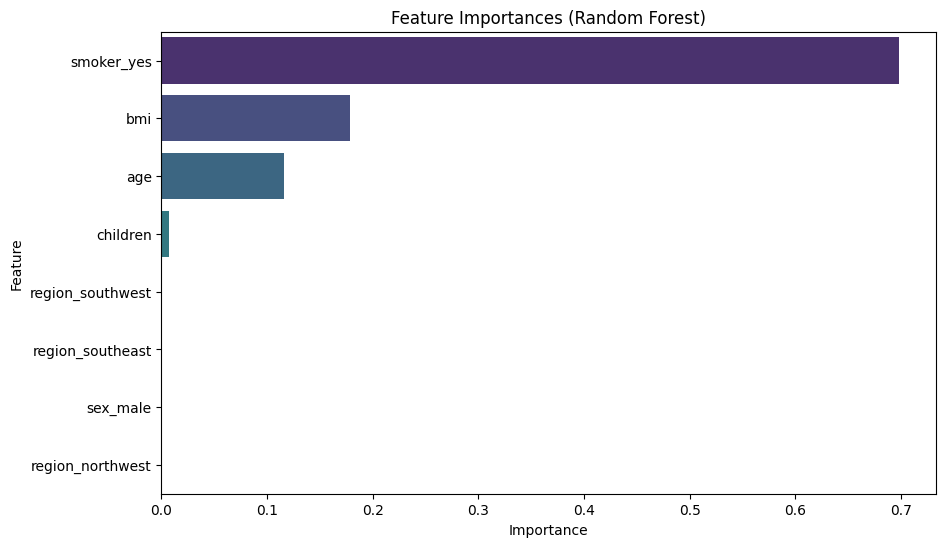


Feature Importances:
            Feature  Importance
4        smoker_yes    0.698436
1               bmi    0.178018
0               age    0.115991
2          children    0.006752
7  region_southwest    0.000364
6  region_southeast    0.000205
3          sex_male    0.000129
5  region_northwest    0.000105


In [17]:
# --- Cell 14: Visualize Feature Importances ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis", hue='Feature', legend=False)
plt.title("Feature Importances (Random Forest)")
plt.show()  # Use plt.show() instead of plt.savefig()

print("\nFeature Importances:")
print(importance_df)